In [1]:
import os
import netCDF4
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature

from matplotlib.animation import FuncAnimation

In [2]:
level = 850
AntPen_W = -100
AntPen_E = -40
AntPen_S = -70
AntPen_N = -45

In [5]:
#################
# Plot figure lat0
#################

## Load Data
#Path
filename_Pres = 'Ann_record_pres.nc'

#Load netcdf
ncdf_pres = netCDF4.Dataset(filename_Pres)

#Get dimension
lonsp = ncdf_pres.variables['longitude'][:]
latsp = ncdf_pres.variables['latitude'][:]
levels = ncdf_pres.variables['level'][:]
times = ncdf_pres.variables['time'][:]

#Calculate datetime
dtimes = np.empty(len(times), dtype='datetime64[h]')
for i,t in enumerate(times):
    dtimes[i] = np.datetime64('1900-01-01') + np.timedelta64(np.int64(t),'h')
dtimes = dtimes.astype('datetime64')
print(dtimes[0])
print(dtimes[-1])

#dtime = pd.to_datetime(dtime.astype('datetime64[M]'))

level=700   
Z = ncdf_pres.variables['z'][:,np.where(levels == level)[0][0],:,:]/10
T = ncdf_pres.variables['t'][:,np.where(levels == level)[0][0],:,:] - 273.15
U = ncdf_pres.variables['u'][:,np.where(levels == level)[0][0],:,:]
V = ncdf_pres.variables['v'][:,np.where(levels == level)[0][0],:,:]

<ipython-input-5-a2b91dfb3a20>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lonsp = ncdf_pres.variables['longitude'][:]
<ipython-input-5-a2b91dfb3a20>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  latsp = ncdf_pres.variables['latitude'][:]
<ipython-input-5-a2b91dfb3a20>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builti

1979-01-01T00
2017-12-01T00


<ipython-input-5-a2b91dfb3a20>:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  T = ncdf_pres.variables['t'][:,np.where(levels == level)[0][0],:,:] - 273.15
<ipython-input-5-a2b91dfb3a20>:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  U = ncdf_pres.variables['u'][:,np.where(levels == level)[0][0],:,:]
<ipython-input-5-a2b91dfb3a20>:32: Deprecat

In [4]:
#################
# Load Data
#################
#Path
filename_Pres = 'Ann_record_sfc.nc'

#Load netcdf
ncdf_sfc = netCDF4.Dataset(filename_Pres)

#Get dimension
lons = ncdf_sfc.variables['longitude'][:]
lats = ncdf_sfc.variables['latitude'][:]
times = ncdf_sfc.variables['time'][:]

#Calculate datetime
dtimes = np.empty(len(times), dtype='datetime64[h]')
for i,t in enumerate(times):
    dtimes[i] = np.datetime64('1900-01-01') + np.timedelta64(np.int64(t),'h')
dtimes = dtimes.astype('datetime64')

print(ncdf_sfc.variables)

pcp = ncdf_sfc.variables['tp'][:,:,:]*1000
tcwv = ncdf_sfc.variables['tcwv'][:,:,:]
msl = ncdf_sfc.variables['msl'][:,:,:]/100
u10 = ncdf_sfc.variables['u10'][:,:,:]
v10 = ncdf_sfc.variables['v10'][:,:,:]
v10 = ncdf_sfc.variables['v10'][:,:,:]


<ipython-input-4-100e1a1b3684>:21: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(ncdf_sfc.variables)


{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (401,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (161,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (468,)
filling on, default _FillValue of -2147483647 used, 'u10': <class 'netCDF4._netCDF4.Variable'>
int16 u10(time, latitude, longitude)
    scale_factor: 0.00044261856757833956
    add_offset: -1.7378674121890627
    _FillValue: -32767
    missing_value: -32767
    units: m s**-1
    long_name: 10 metre U wind component
unlimited dimensio

C:\ProgramData\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewiths'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


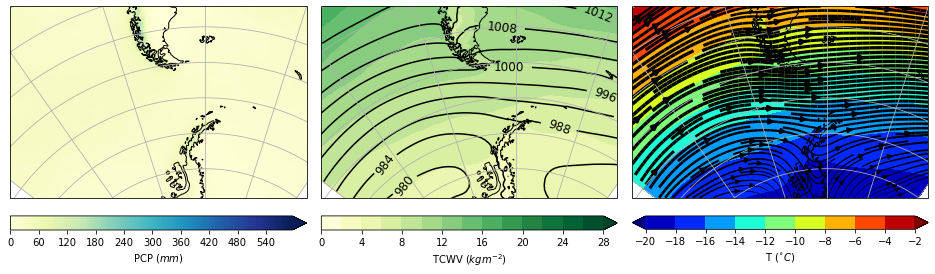

In [5]:
#################
# Plot Case Study
#################

i_ini = np.argwhere(dtimes == np.datetime64('2001-03-01T00'))[0][0]
i_end = np.argwhere(dtimes == np.datetime64('2002-02-01T00'))[0][0]
#i_dtime = np.argwhere(dtimes == np.datetime64('2016-07-16T12'))[0][0]

##Plot
projection=ccrs.LambertConformal(central_longitude=-60,standard_parallels=(-75,-45))
#Define map
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,3,1, projection=projection)
ax1.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax1.coastlines(resolution='50m')
ax1.gridlines(draw_labels=False)

ax2 = plt.subplot(1,3,2, projection=projection)
ax2.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax2.coastlines(resolution='50m')
ax2.gridlines(draw_labels=False)

ax3 = plt.subplot(1,3,3, projection=projection)
ax3.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax3.coastlines(resolution='50m')
ax3.gridlines(draw_labels=False)

#Plot ERA5
CS1 = ax1.contourf(lons, lats, np.sum(pcp[i_ini:i_end,:,:], axis=0), np.arange(0,600,4), cmap='YlGnBu', transform=ccrs.PlateCarree(), extend='max')
CB1 = plt.colorbar(CS1, orientation='horizontal', ax=ax1, pad=0.05)
CB1.set_label('PCP ($mm$)')

CS2b = ax2.contour(lons, lats, np.mean(msl[i_ini:i_end,:,:], axis=0), np.arange(800,1100,4), linewiths=.5, colors='k', transform=ccrs.PlateCarree())
CS2 = ax2.contourf(lons, lats, np.mean(tcwv[i_ini:i_end,:,:], axis=0), np.arange(0,30,2), cmap='YlGn', transform=ccrs.PlateCarree(), extend='max')
CB2 = plt.colorbar(CS2, orientation='horizontal', ax=ax2, pad=0.05)
CB2.set_label('TCWV ($kg m^{-2}$)')

CS3 = ax3.contourf(lonsp, latsp, np.mean(T[i_ini:i_end,:,:], axis=0), np.arange(-20,0,2), cmap='jet', transform=ccrs.PlateCarree(), extend='both')
CB3 = plt.colorbar(CS3, orientation='horizontal', ax=ax3, pad=0.05)
CB3.set_label('T ($^{\circ}C$)')

speed = np.sqrt(np.mean(U[i_ini:i_end,:,:], axis=0)**2 + np.mean(V[i_ini:i_end,:,:], axis=0)**2)
lw = 4 * speed / speed.max()
CS4 = ax3.streamplot(lonsp, latsp, np.mean(U[i_ini:i_end,:,:], axis=0), np.mean(V[i_ini:i_end,:,:], axis=0), density=1.5, linewidth=lw, color='k', transform=ccrs.PlateCarree())

#Set Parameters
ax2.clabel(CS2b, inline=1, fontsize=12, fmt='%1.0f')
#cb.set_label('T $^\circ$C', rotation=0, fontsize=12)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, wspace=0.05)

C:\ProgramData\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewiths'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


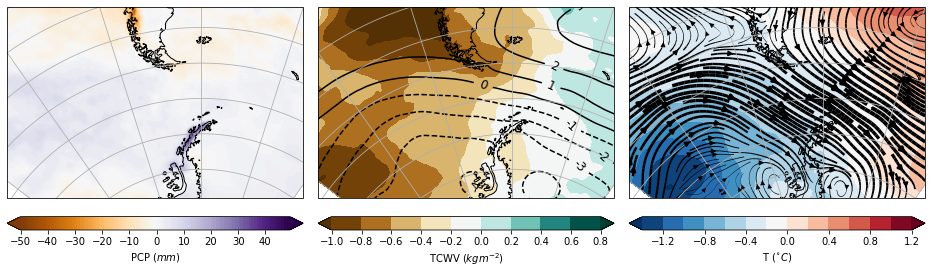

In [7]:
#################
# Plot Case Study
#################

i_ini = np.argwhere(dtimes == np.datetime64('2001-03-01T00'))[0][0]
i_end = np.argwhere(dtimes == np.datetime64('2002-02-01T00'))[0][0]
#i_dtime = np.argwhere(dtimes == np.datetime64('2016-07-16T12'))[0][0]

##Plot
projection=ccrs.LambertConformal(central_longitude=-60,standard_parallels=(-75,-45))
#Define map
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,3,1, projection=projection)
ax1.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax1.coastlines(resolution='50m')
ax1.gridlines(draw_labels=False)

ax2 = plt.subplot(1,3,2, projection=projection)
ax2.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax2.coastlines(resolution='50m')
ax2.gridlines(draw_labels=False)

ax3 = plt.subplot(1,3,3, projection=projection)
ax3.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax3.coastlines(resolution='50m')
ax3.gridlines(draw_labels=False)

#Plot ERA5
CS1 = ax1.contourf(lons, lats, (np.mean(pcp[i_ini:i_end,:,:], axis=0)-np.mean(pcp[:,:,:], axis=0))*12, np.arange(-50,50,1), cmap='PuOr', transform=ccrs.PlateCarree(), extend='both')
CB1 = plt.colorbar(CS1, orientation='horizontal', ax=ax1, pad=0.05)
CB1.set_label('PCP ($mm$)')

CS2b = ax2.contour(lons, lats, np.mean(msl[i_ini:i_end,:,:], axis=0)-np.mean(msl[:,:,:], axis=0), np.arange(-10,10,1), linewiths=.5, colors='k', transform=ccrs.PlateCarree())
CS2 = ax2.contourf(lons, lats, np.mean(tcwv[i_ini:i_end,:,:], axis=0)-np.mean(tcwv[:,:,:], axis=0), np.arange(-1,1,.2), cmap='BrBG', transform=ccrs.PlateCarree(), extend='both')
CB2 = plt.colorbar(CS2, orientation='horizontal', ax=ax2, pad=0.05)
CB2.set_label('TCWV ($kg m^{-2}$)')

CS3 = ax3.contourf(lonsp, latsp, np.mean(T[i_ini:i_end,:,:], axis=0)-np.mean(T[:,:,:], axis=0), np.arange(-1.4,1.4,.2), cmap='RdBu_r', transform=ccrs.PlateCarree(), extend='both')
CB3 = plt.colorbar(CS3, orientation='horizontal', ax=ax3, pad=0.05)
CB3.set_label('T ($^{\circ}C$)')

speed = np.sqrt((np.mean(U[i_ini:i_end,:,:], axis=0)-np.mean(U[:,:,:], axis=0))**2 + (np.mean(V[i_ini:i_end,:,:], axis=0)-np.mean(V[:,:,:], axis=0))**2)
lw = 4 * speed / speed.max()
CS4 = ax3.streamplot(lonsp, latsp, np.mean(U[i_ini:i_end,:,:], axis=0)-np.mean(U[:,:,:], axis=0), np.mean(V[i_ini:i_end,:,:]-np.mean(V[:,:,:], axis=0), axis=0), density=1.5, linewidth=lw, color='k', transform=ccrs.PlateCarree())

#Set Parameters
ax2.clabel(CS2b, inline=1, fontsize=12, fmt='%1.0f')
#cb.set_label('T $^\circ$C', rotation=0, fontsize=12)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, wspace=0.05)

In [42]:
np.mean(msl[i_ini:i_end,:,:], axis=0)

masked_array(
  data=[[1014.7342776557405, 1014.7569196920912, 1014.7773959684433, ...,
         1015.6876058297486, 1015.6926264552003, 1015.7046365788298],
        [1014.5397530303956, 1014.5651514885632, 1014.5864153140056, ...,
         1015.4620714589665, 1015.4701438371438, 1015.4810710807741],
        [1014.3339073868751, 1014.3589120704975, 1014.3866731759362, ...,
         1015.2357495390941, 1015.2454954590886, 1015.2545522736291],
        ...,
        [986.3538633008285, 986.3705002753645, 986.4026913444372, ...,
         988.284343008831, 988.368610761511, 988.4500236487377],
        [986.2689064426944, 986.3166516063037, 986.360163693552, ...,
         988.9021752703011, 988.9812255102566, 989.0602757502118],
        [986.1951721590996, 986.2417359990733, 986.288299839047, ...,
         989.3750984991256, 989.3957716627501, 989.4167401572838]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, 

In [43]:
np.mean(msl[:,:,:], axis=0)

masked_array(
  data=[[1016.6610171366117, 1016.6759553273727, 1016.6874713396749, ...,
         1015.2887212604631, 1015.3002997466104, 1015.3185745035235],
        [1016.5064313890085, 1016.5221123243836, 1016.5339615305305, ...,
         1015.0500086944431, 1015.0641694328988, 1015.0813312298112],
        [1016.3396401029484, 1016.355318724477, 1016.373445395236, ...,
         1014.8073880422735, 1014.8234183684191, 1014.8382385530246],
        ...,
        [989.5036848196124, 989.5293847088292, 989.5718229611123, ...,
         992.1754667750291, 992.2491326949882, 992.319357925717],
        [989.4037035273616, 989.462415059636, 989.5160199334516, ...,
         992.7866831193007, 992.8548814208015, 992.9232694576849],
        [989.3119201920281, 989.3688315519968, 989.4257891888865, ...,
         993.2368303190475, 993.2493968175013, 993.2622988236479]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, 

In [44]:
np.mean(msl[i_ini:i_end,:,:], axis=0)-np.mean(msl[:,:,:], axis=0)

masked_array(
  data=[[-1.9267394808712197, -1.9190356352814888, -1.9100753712315282,
         ..., 0.39888456928542837, 0.39232670858984875,
         0.3860620753063131],
        [-1.9666783586129668, -1.9569608358203823, -1.94754621652487,
         ..., 0.4120627645233981, 0.4059744042450575, 0.3997398509628738],
        [-2.0057327160732257, -1.996406653979534, -1.9867722192998372,
         ..., 0.4283614968205711, 0.42207709066951793,
         0.41631372060453486],
        ...,
        [-3.149821518783938, -3.1588844334646637, -3.169131616675031,
         ..., -3.8911237661981204, -3.880521933477212,
         -3.869334276979316],
        [-3.134797084667184, -3.145763453332279, -3.155856239899663, ...,
         -3.8845078489996467, -3.8736559105448123, -3.8629937074731515],
        [-3.1167480329285127, -3.1270955529234925, -3.137489349839484,
         ..., -3.8617318199219426, -3.853625154751171,
         -3.845558666364127]],
  mask=[[False, False, False, ..., False, False, False